In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
zipcodes = pd.read_csv("ZIP_TRACT_122023.csv")
zipcodes.head(10)

,ZIP,TRACT,USPS_ZIP_PREF_CITY,USPS_ZIP_PREF_STATE,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,501,36103158607,HOLTSVILLE,NY,0.000000,1.000000,0.000000,1.000000
1,601,72001956800,ADJUNTAS,PR,0.014530,0.012469,0.042683,0.015121
2,601,72113071700,ADJUNTAS,PR,0.158291,0.199501,0.128049,0.160094
3,601,72001956600,ADJUNTAS,PR,0.180513,0.351621,0.378049,0.196259
4,601,72001956700,ADJUNTAS,PR,0.646667,0.436409,0.451220,0.628527
5,602,72005400300,AGUADA,PR,0.000000,0.001013,0.000000,0.000077
6,602,72003430300,AGUADA,PR,0.230970,0.393110,0.385281,0.245944
7,602,72117959401,AGUADA,PR,0.000591,0.000000,0.000000,0.000536
8,602,72003430602,AGUADA,PR,0.051983,0.005066,0.000000,0.047521
9,602,72003430200,AGUADA,PR,0.716456,0.600811,0.614719,0.705923


In [3]:
# Getting the count of tracts in each zip code

#print(zipcodes.columns)
#print(zipcodes.describe())

philly_zip = zipcodes[zipcodes["USPS_ZIP_PREF_CITY"]=="PHILADELPHIA"]
#print(philly_zip)
phil_pa = philly_zip[philly_zip["USPS_ZIP_PREF_STATE"] =="PA"]
#print(phil_pa)

num_zips = phil_pa["ZIP"].value_counts()
#print(num_zips)
for k,v in num_zips.items():
    print(f"{k}: {v}")

19140: 25
19104: 24
19143: 23
19145: 22
19144: 22
19124: 22
19146: 21
19120: 20
19131: 20
19111: 19
19134: 19
19149: 19
19121: 19
19139: 18
19147: 17
19148: 17
19132: 17
19125: 16
19128: 15
19130: 15
19150: 14
19138: 14
19103: 14
19114: 13
19133: 13
19115: 12
19119: 12
19141: 12
19136: 12
19151: 12
19122: 12
19135: 11
19118: 11
19106: 11
19154: 10
19152: 10
19129: 10
19102: 10
19123: 10
19142: 10
19116: 9
19126: 9
19137: 9
19107: 8
19153: 8
19127: 5
19112: 4
19110: 1
19105: 1
19101: 1
19113: 1
19108: 1
19109: 1
19160: 1
19172: 1
19176: 1
19181: 1
19192: 1


In [4]:
phil_pa["TRACT"]

32376    42101036902
32377    42101001101
32378    42101000806
32379    42101001204
32380    42101000300
            ...     
33057    42101989300
33058    42101001001
33059    42101980901
33060    42101000101
33061    42101000403
Name: TRACT, Length: 686, dtype: int64

In [5]:
# Now, compare the ratios of the residential tracts in each zip code

# Grouping them by zipcodes ,find the max residential ratio and the corresponding 
# tract ID & business ratio

idx = phil_pa[['ZIP', 
        'TRACT', 'RES_RATIO', 'BUS_RATIO']].groupby('ZIP')['RES_RATIO'].idxmax()
max_scores = phil_pa[['ZIP', 
        'TRACT', 'RES_RATIO', 'BUS_RATIO']].loc[idx]


In [6]:
max_scores

,ZIP,TRACT,RES_RATIO,BUS_RATIO
32376,19101,42101036902,1.000000,1.000000
32378,19102,42101000806,0.331541,0.303545
32398,19103,42101000300,0.167443,0.073126
32403,19104,42101036902,0.104743,0.192976
32425,19105,42101000500,1.000000,1.000000
32430,19106,42101000102,0.244890,0.116338
32441,19107,42101000500,0.176954,0.466703
32445,19108,42101037600,0.000000,1.000000
32446,19109,42101000600,1.000000,1.000000
32447,19110,42101000600,1.000000,1.000000


In [7]:
demographics = pd.read_csv("ACSST5Y2022.S2201-Column-Metadata.csv")
demographics.head(10)
demographics.columns

Index(['Column Name', 'Label'], dtype='object')

In [8]:
demo2 = pd.read_csv("ACSST5Y2022.S2201-Data.csv")

/tmp/ipykernel_47973/3838787831.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,70,71,72,73,74,75,76,77,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,222,223,224,225,226,227,228,229,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,374,375,376,377,378,379,380,381) have mixed types. Specify dtype option on import or set low_memory=False.
  demo2 = pd.read_csv("ACSST5Y2022.S2201-Data.csv")


In [12]:
estimate = demographics[demographics["Label"].str.contains("Estimate")]["Column Name"].tolist()
estimate.append("GEO_ID")
estimate.append("NAME")
#print(estimate)


new_demo = demo2[estimate]
new_demo.head(10)

,S2201_C01_001E,S2201_C01_002E,S2201_C01_003E,S2201_C01_004E,S2201_C01_005E,S2201_C01_006E,S2201_C01_007E,S2201_C01_008E,S2201_C01_009E,S2201_C01_010E,...,S2201_C06_031E,S2201_C06_032E,S2201_C06_033E,S2201_C06_034E,S2201_C06_035E,S2201_C06_036E,S2201_C06_037E,S2201_C06_038E,GEO_ID,NAME
0,Estimate!!Total!!Households,Estimate!!Total!!Households!!With one or more ...,Estimate!!Total!!Households!!No people in the ...,Estimate!!Total!!Households!!Married-couple fa...,Estimate!!Total!!Households!!Other family:,Estimate!!Total!!Households!!Other family:!!Ma...,Estimate!!Total!!Households!!Other family:!!Fe...,Estimate!!Total!!Households!!Nonfamily households,Estimate!!Total!!Households!!With children und...,Estimate!!Total!!Households!!With children und...,...,Estimate!!Percent households not receiving foo...,Estimate!!Percent households not receiving foo...,Estimate!!Percent households not receiving foo...,Estimate!!Percent households not receiving foo...,Estimate!!Percent households not receiving foo...,Estimate!!Percent households not receiving foo...,Estimate!!Percent households not receiving foo...,Estimate!!Percent households not receiving foo...,Geography,Geographic Area Name
1,700,323,377,444,96,15,81,160,193,141,...,4.7,12.1,61.7,(X),(X),19.2,24.5,56.3,1400000US01001020100,Census Tract 201; Autauga County; Alabama
2,544,298,246,154,197,66,131,193,78,61,...,3.8,0.0,45.9,(X),(X),7.2,38.6,54.3,1400000US01001020200,Census Tract 202; Autauga County; Alabama
3,1305,565,740,569,351,61,290,385,487,242,...,0.0,1.4,75.7,(X),(X),10.1,28.6,61.2,1400000US01001020300,Census Tract 203; Autauga County; Alabama
4,1666,948,718,1048,188,29,159,430,383,236,...,5.3,0.8,88.8,(X),(X),27.1,34.4,38.5,1400000US01001020400,Census Tract 204; Autauga County; Alabama
5,1783,455,1328,1074,202,6,196,507,492,421,...,3.0,0.5,81.0,(X),(X),11.9,24.2,63.9,1400000US01001020501,Census Tract 205.01; Autauga County; Alabama
6,1327,442,885,582,205,40,165,540,550,374,...,3.9,6.4,64.5,(X),(X),14.9,17.1,68.1,1400000US01001020502,Census Tract 205.02; Autauga County; Alabama
7,1447,327,1120,682,137,5,132,628,452,415,...,8.4,0.8,67.1,(X),(X),14.0,31.6,54.4,1400000US01001020503,Census Tract 205.03; Autauga County; Alabama
8,1341,582,759,722,166,15,151,453,473,390,...,2.2,4.9,83.6,(X),(X),20.0,29.2,50.8,1400000US01001020600,Census Tract 206; Autauga County; Alabama
9,1317,472,845,497,221,13,208,599,477,352,...,1.5,7.3,63.7,(X),(X),6.8,34.7,58.4,1400000US01001020700,Census Tract 207; Autauga County; Alabama


In [13]:
# Demographics in Philadelphia

phil_demo = new_demo[new_demo["NAME"].str.contains("Philadelphia")]

# Total households 
total_households = phil_demo["S2201_C01_001E"].sum()
print(f"There are {total_households} households in total in Philadelphia")

There are 659129 households in total in Philadelphia


In [14]:


# Ethnicities

# White

#Total amount of white households (identify as hispanic or non-hispanic)
white_total = phil_demo["S2201_C01_025E"].sum() + phil_demo["S2201_C01_033E"].sum()
w_pct = white_total/total_households
print(f"Total White: {white_total}, or {w_pct}")

# Food stamps
white_fs = phil_demo["S2201_C03_025E"].sum() + phil_demo["S2201_C03_033E"].sum()
print(f"Total White with Food Stamps: {white_fs}")

# No food stamps
white_nfs = phil_demo["S2201_C05_025E"].sum() + phil_demo["S2201_C05_033E"].sum()
print(f"Total White with no Food Stamps: {white_nfs}")
print()


# Black or African Americans

# Total
african_total = phil_demo["S2201_C01_026E"].sum()
print(f"Total African Americans: {african_total}")

#Food stamps
african_fs = phil_demo["S2201_C03_026E"].sum()
print(f"Total African Americans with Food Stamps: {african_fs}")

# No food stamps
african_nfs = phil_demo["S2201_C05_026E"].sum()
print(f"Total African Americans with no Food Stamps: {african_nfs}")
print()

# American Indian and Alaska Native

# Total
indian_total = phil_demo["S2201_C01_027E"].sum()
print(f"Total American Indians: {indian_total}")

#Food stamps
indian_fs = phil_demo["S2201_C03_027E"].sum()
print(f"Total American Indians with Food Stamps: {indian_fs}")

# No food stamps
indian_nfs = phil_demo["S2201_C05_027E"].sum()
print(f"Total American Indians with no Food Stamps: {indian_nfs}")
print()

# Asians

# Total
asian_total = phil_demo["S2201_C01_028E"].sum()
print(f"Total Asians: {asian_total}")

#Food stamps
asian_fs = phil_demo["S2201_C03_028E"].sum()
print(f"Total Asians with Food Stamps: {asian_fs}")

# No food stamps
asian_nfs = phil_demo["S2201_C05_028E"].sum()
print(f"Total Asians with no Food Stamps: {asian_nfs}")
print()

# Native Hawaian and Other Pacific Islander

# Total
pac_total = phil_demo["S2201_C01_029E"].sum()
print(f"Total Native Hawains: {pac_total}")

#Food stamps
pac_fs = phil_demo["S2201_C03_029E"].sum()
print(f"Total Native Hawains with Food Stamps: {pac_fs}")

# No food stamps
pac_nfs = phil_demo["S2201_C05_029E"].sum()
print(f"Total Native Hawains with no Food Stamps: {pac_nfs}")
print()

# Other

# Total
other_total = phil_demo["S2201_C01_030E"].sum()
print(f"Total 'Other': {other_total}")

#Food stamps
other_fs = phil_demo["S2201_C03_030E"].sum()
print(f"Total 'Other' with Food Stamps: {other_fs}")

# No food stamps
other_nfs = phil_demo["S2201_C05_030E"].sum()
print(f"Total 'Other' with no Food Stamps: {other_nfs}")
print()

# Two or More

# Total
tm_total = phil_demo["S2201_C01_031E"].sum()
print(f"Total 'Two or More': {tm_total}")

#Food stamps
tm_fs = phil_demo["S2201_C03_031E"].sum()
print(f"Total 'Two or More' with Food Stamps: {tm_fs}")

# No food stamps
tm_nfs = phil_demo["S2201_C05_031E"].sum()
print(f"Total 'Two or More' with no Food Stamps: {tm_nfs}")
print()

# Hispanic

# Total
hisp_total = phil_demo["S2201_C01_032E"].sum()
print(f"Total Hispanic: {hisp_total}")

#Food stamps
hisp_fs = phil_demo["S2201_C03_032E"].sum()
print(f"Total Hispanic with Food Stamps: {hisp_fs}")

# No food stamps
hisp_nfs = phil_demo["S2201_C05_032E"].sum()
print(f"Total Hispanic with no Food Stamps: {hisp_nfs}")
print()

Total White: 528014, or 0.8010783928487444
Total White with Food Stamps: 66766
Total White with no Food Stamps: 461248

Total African Americans: 261888
Total African Americans with Food Stamps: 95066
Total African Americans with no Food Stamps: 166822

Total American Indians: 1772
Total American Indians with Food Stamps: 784
Total American Indians with no Food Stamps: 988

Total Asians: 43912
Total Asians with Food Stamps: 8520
Total Asians with no Food Stamps: 35392

Total Native Hawains: 323
Total Native Hawains with Food Stamps: 83
Total Native Hawains with no Food Stamps: 240

Total 'Other': 43807
Total 'Other' with Food Stamps: 22147
Total 'Other' with no Food Stamps: 21660

Total 'Two or More': 33429
Total 'Two or More' with Food Stamps: 8861
Total 'Two or More' with no Food Stamps: 24568

Total Hispanic: 80306
Total Hispanic with Food Stamps: 34459
Total Hispanic with no Food Stamps: 45847



In [15]:
# Poverty Rates


# Below Poverty Levels

# Total
poverty_total = phil_demo["S2201_C01_021E"].sum()
print(f"Total households below poverty levels: {poverty_total}")

#Food stamps
poverty_fs = phil_demo["S2201_C03_021E"].sum()
print(f"Total households below poverty levels with Food Stamps: {poverty_fs}")

# No food stamps
poverty_nfs = phil_demo["S2201_C05_021E"].sum()
print(f"Total households below poverty levels with no Food Stamps: {poverty_nfs}")
print()

# Above Poverty Levels

# Total
apoverty_total = phil_demo["S2201_C01_022E"].sum()
print(f"Total households above poverty levels: {apoverty_total}")

#Food stamps
apoverty_fs = phil_demo["S2201_C03_022E"].sum()
print(f"Total households above poverty levels with Food Stamps: {apoverty_fs}")

# No food stamps
apoverty_nfs = phil_demo["S2201_C05_022E"].sum()
print(f"Total households above poverty levels with no Food Stamps: {apoverty_nfs}")
print()

# All poverty
all_poverty = poverty_total + apoverty_total
# Mapping

poverty = pd.DataFrame()
poverty["Poverty Status"] = ["Above Line", "Below Line"]
poverty["Food Stamps"] = [f"{(apoverty_fs/all_poverty)*100:.1f}%", f"{(poverty_fs/all_poverty)*100:.1f}%"]
poverty["No Food Stamps"] = [f"{(apoverty_nfs/all_poverty)*100:.1f}%", f"{(poverty_nfs/all_poverty)*100:.1f}%"]
poverty

Total households below poverty levels: 142191
Total households below poverty levels with Food Stamps: 82585
Total households below poverty levels with no Food Stamps: 59606

Total households above poverty levels: 516938
Total households above poverty levels with Food Stamps: 89561
Total households above poverty levels with no Food Stamps: 427377



,Poverty Status,Food Stamps,No Food Stamps
0,Above Line,13.6%,64.8%
1,Below Line,12.5%,9.0%


Total African Americans: 261888
Total African Americans with Food Stamps: 95066
Total African Americans with no Food Stamps: 166822

          Status   Total
0     Food Stamp   95066
1  No Food Stamp  166822


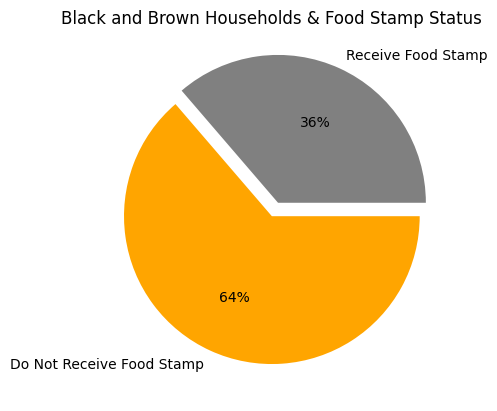

In [16]:
# Black an=d Brown Households and Food Stamps
african_total = phil_demo["S2201_C01_026E"].sum()
print(f"Total African Americans: {african_total}")

#Food stamps
african_fs = phil_demo["S2201_C03_026E"].sum()
print(f"Total African Americans with Food Stamps: {african_fs}")

# No food stamps
african_nfs = phil_demo["S2201_C05_026E"].sum()
print(f"Total African Americans with no Food Stamps: {african_nfs}")
print()

black_dem = pd.DataFrame()

black_dem["Status"] = ["Food Stamp", "No Food Stamp"]

black_dem["Total"] = [african_fs, african_nfs]
print(black_dem)

status = black_dem["Total"]

plt.pie(status, labels = ["Receive Food Stamp", "Do Not Receive Food Stamp"], explode = (0.1, 0),
        colors = ['grey', 'orange'], autopct = '%1.0f%%')
plt.title("Black and Brown Households & Food Stamp Status")
plt.show()

In [17]:
ethnic_zip = pd.read_csv("schoolOut.csv")
ethnic_zip["BlackAACount"]

black_hs = ethnic_zip[['Zip Code','BlackAACount', 'Income']].groupby(['Zip Code']).agg({'BlackAACount':'sum','Income':'mean'})
black_hs


,BlackAACount,Income
Zip Code,,
19103,0.0,83988.0
19104,906.0,30734.0
19106,255.0,126287.0
19111,884.0,55569.0
19114,189.0,70838.0
19115,0.0,62044.0
19116,571.0,59390.0
19118,0.0,86475.0
19119,0.0,72685.0


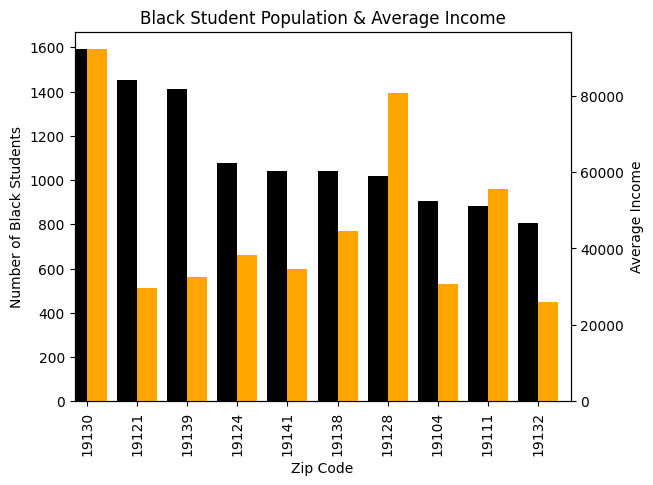

In [18]:
top_black_hs = black_hs.sort_values(by = ['BlackAACount'], ascending = False).head(10)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

top_black_hs.BlackAACount.plot(kind='bar', color='black', ax=ax, width=width, position=1)
top_black_hs.Income.plot(kind='bar', color='orange', ax=ax2, width=width, position=0)

ax.set_ylabel('Number of Black Students')
ax2.set_ylabel('Average Income')
plt.title("Black Student Population & Average Income")
plt.show()

In [ ]:
# Belmont, Zip code 19104 -- 7 miles south of Hunting Park
# Average income of $30,740
# About twice the size of Hunting Park, not only get more out of student population but 
# also get more volunteers
# 10.47% residential  -- 19.30% businesses (opportunities for donors)
# Food insecurity -- 778 households are single parents get SNAP (food stamps), 1% of single 
# parent households
# Educational Quality -- 70% graduation rate 37% go to college


# Reaching out to colleges and college students to help volunteer for man power
# Temple University (19140), Drexel University(19104) 3.5 miles from Allegheny


# Allegheny West, Zip code 19132 -- 2.5 miles away from Hunting Park
# Average income of $26,041
# About twice the size of Junting Park, not only more student population but more volunteers
# 14.20% residential -- 8% businesses (oportunities for donors)
# Food insecurity -- 4% get food stamps, 11,150 households
# Educational Quality -- 81% graduation, only 25% go to college
